In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
path = 'D:\\Documents\\600x\\_June\\Python-Data-Science-and-Machine-Learning-Bootcamp\\Python-for-Data-Analysis\\Pandas\\city_climate_data_new.csv'
path2 = 'D:\\Documents\\600x\\_June\\Python-Data-Science-and-Machine-Learning-Bootcamp\\Python-for-Data-Analysis\\Pandas\\city_climate_data_newest.csv'

In [4]:
# data = pd.read_csv('city_climate_data.csv', encoding='utf-8', index_col=[0, 1])
data_1 = pd.read_csv(path, encoding='utf-8', index_col=[0, 1])
data_2 = pd.read_csv(path2, encoding='utf-8', index_col=[0, 1])

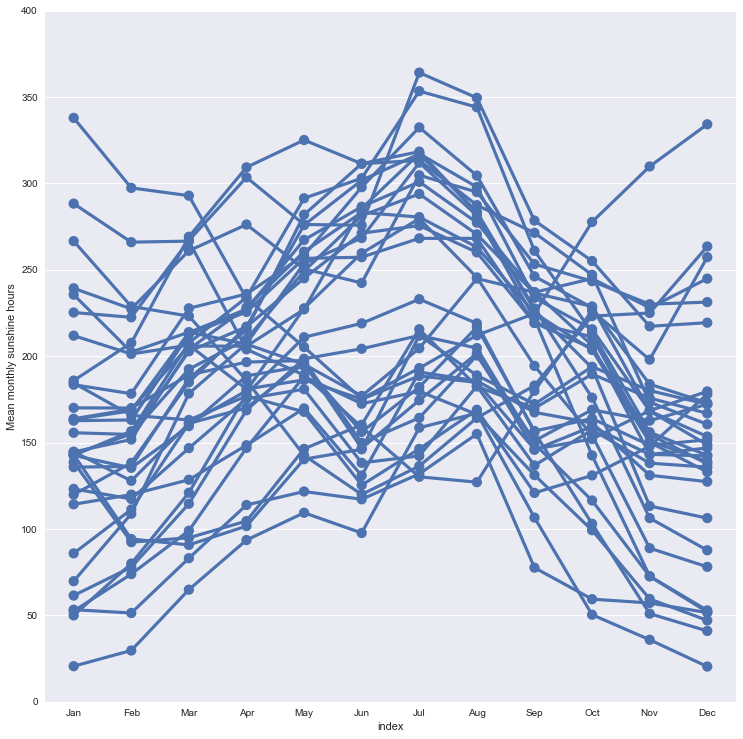

In [16]:
#rough attempt at graphing city sunlight hours
sun = data_1.xs('Mean monthly sunshine hours', level=1).drop('Year', axis=1).T
sun.reset_index(inplace=True)

sunfig = plt.figure(figsize=(12, 12))
axes = sunfig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.set_ylim(0, 400)
for i, city in enumerate(sun.iloc[:, 1:]):
    sns.pointplot(data=sun, x='index', y=sun[city], ax=axes)
axes.set_ylabel('Mean monthly sunshine hours');

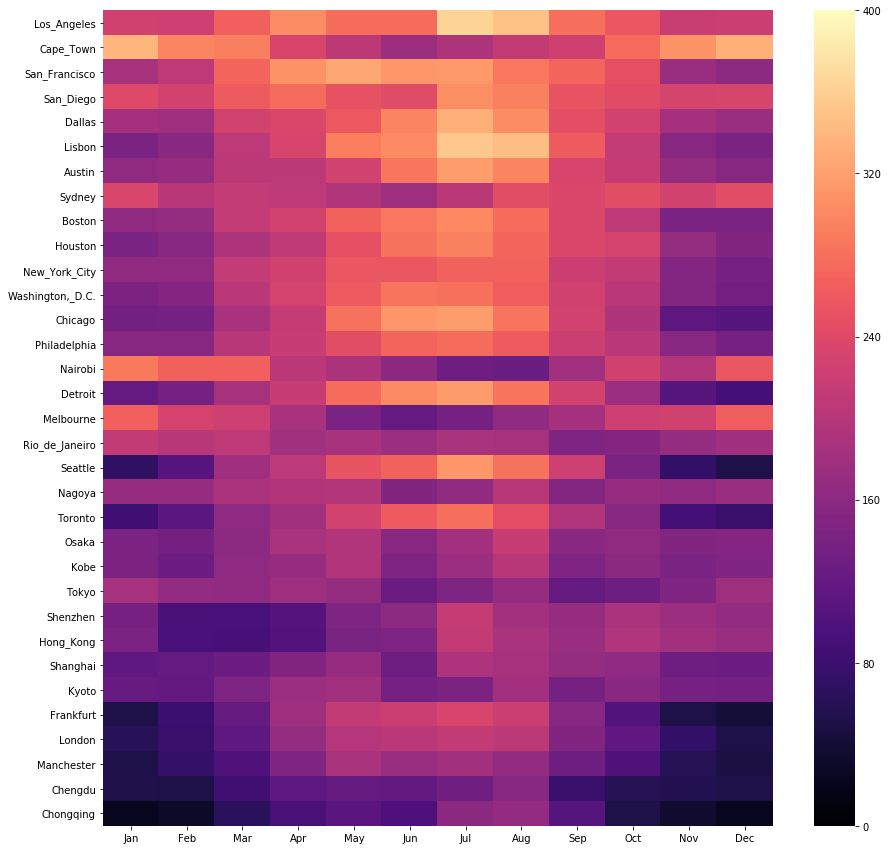

In [4]:
sun = data_1.xs('Mean monthly sunshine hours', level=1).drop('Year', axis=1).T

means = pd.DataFrame({col: sun[col].sum() for col in sun.columns.tolist()}, index=[0]).T
means.sort_values(0, ascending=False, inplace=True)
hilo_index = means.index.tolist()

ordered_sun = sun[hilo_index]

sunmap = plt.figure(figsize=(15, 15))
axis = sunmap.add_axes()
sns.heatmap(ordered_sun.T, cmap='magma', ax=axis, vmin=0, vmax=400);

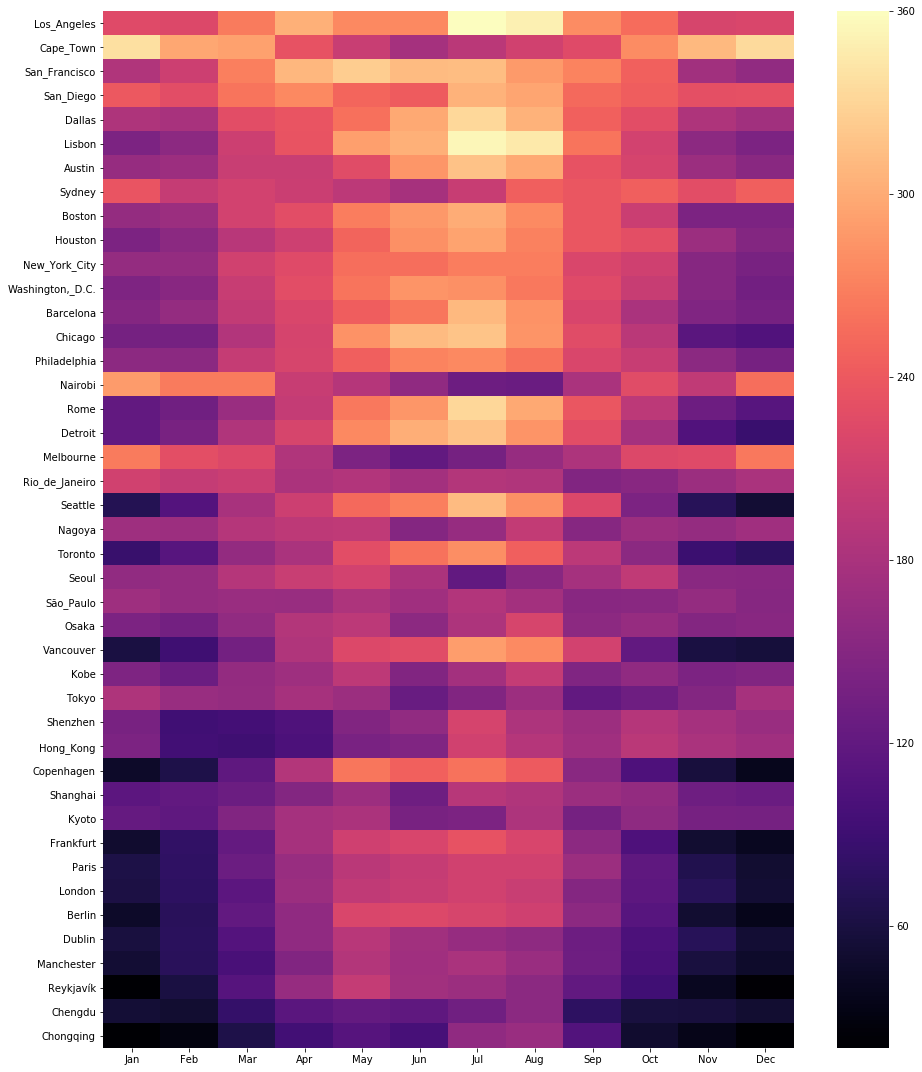

In [39]:
sun = data_2.xs('Mean monthly sunshine hours', level=1).drop('Year', axis=1).T

total_sun = pd.DataFrame({col: sun[col].sum() for col in sun.columns.tolist()}, index=[0]).T
total_sun.sort_values(0, ascending=False, inplace=True)
hilo_index = total_sun.index.tolist()
ordered_sun = sun[hilo_index]

sunmap = plt.figure(figsize=(15, 18))
axis = sunmap.add_axes([0.1, 0.1, 0.8, 0.8])
sns.heatmap(ordered_sun.T, cmap='magma', ax=axis, vmin=20, vmax=360);

In [16]:
sun = data_2.xs('Mean monthly sunshine hours', level=1).drop('Year', axis=1).T
total_sun = pd.DataFrame({col: sun[col].sum() for col in sun.columns.tolist()}, index=[0]).T
total_sun.sort_values(0, ascending=False, inplace=True)

total_sun['bin'] = np.nan
total_sun.reset_index(inplace=True)
total_sun.columns = ['City', 'Mean yearly sun hours', 'bin']


In [17]:
#creates boolean dataframes for conditional selection
sun_hours2 = {}

for band in '1000-1400 1400-1800 1800-2200 2200-2600 2600-3000'.split():
    low, high = band.split('-')
    sun_hours2[band] = eval(f"(total_sun['Mean yearly sun hours']>{low}) & (total_sun['Mean yearly sun hours']<{high})")

sun_hours2['<1000'] = total_sun['Mean yearly sun hours']<1000
sun_hours2['>3000'] = total_sun['Mean yearly sun hours']>3000

In [18]:
for band in sun_hours2:
    total_sun.loc[sun_hours2[band], 'bin'] = band

# previously I was attempting to do 
#     total_sun.loc[sun_hours['>3000']['bin']
# which does the conditional selection and then returns a copy of the ['bin'] column to which the value would be assigned
# this results an error message. When trying to assign conditionally to a column, use the DataFrame[selector, column] syntax

In [19]:
bin_colors = {'<1000':'black', '1000-1400':'darkblue', '1400-1800':'purple', '1800-2200':'blueviolet', '2200-2600':'orangered', '2600-3000':'orange', '>3000':'yellow'}
clrs = [bin_colors[j.bin] for i, j in total_sun.iterrows()]

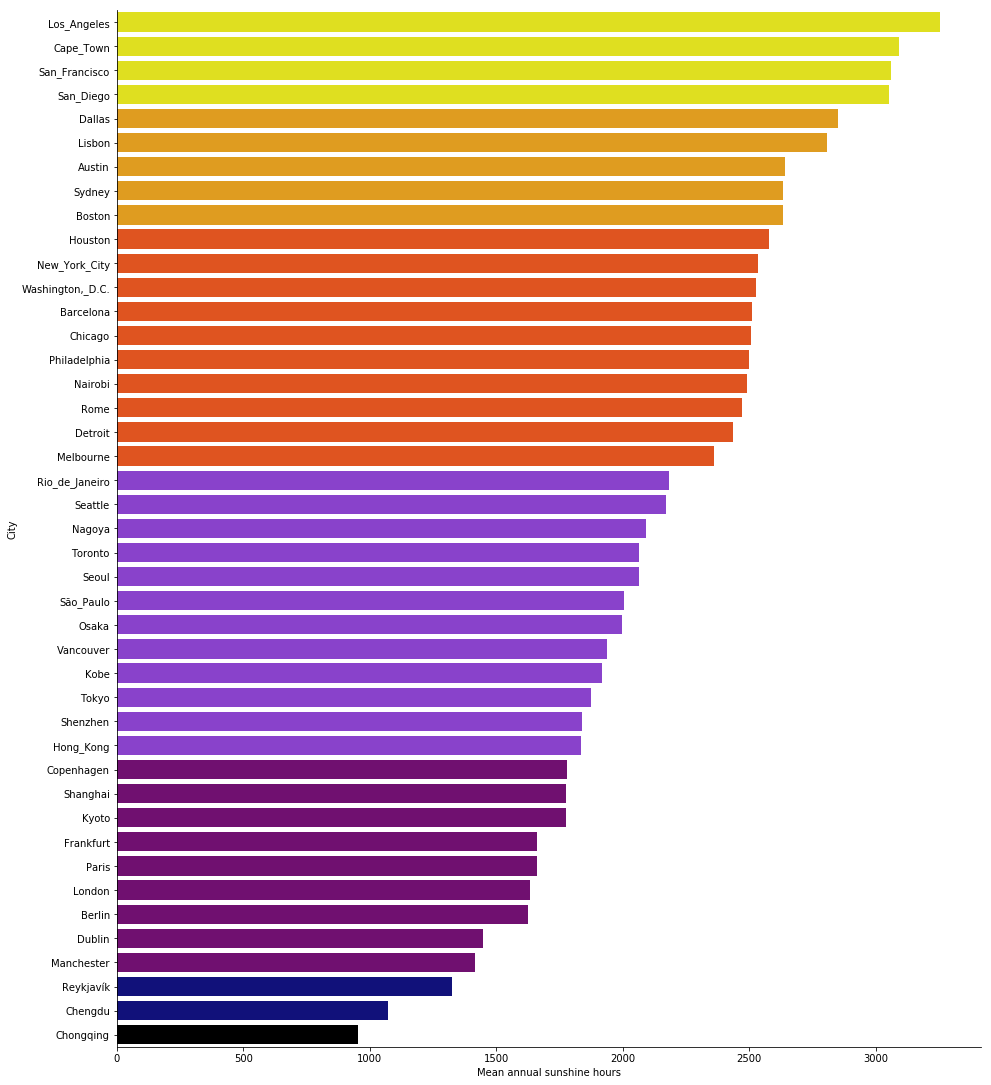

In [20]:
sun = plt.figure(figsize=(15, 18))
axes = sun.add_axes([0.1, 0.1, 0.8, 0.8])
sns.barplot(data=total_sun, y='City', x='Mean yearly sun hours', orient='h', ax=axes, palette=clrs)
axes.set_xlabel('Mean annual sunshine hours')
sns.despine();